In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
import datetime
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
pd.set_option('display.max_columns', None)

In [3]:
# Cargamos los datos
file = "Informacion Puerto Angamos 20200115 - 2020220622.xlsx"
df = pd.read_excel(file)
df.shape

(5881, 19)

In [4]:
#  & df["Hora Legada a Espera"].notna()
df_ss = df[df["Producto"].notna() & df["Hora Ingreso a Puerto"].notna()]
df_ss.shape

(5684, 19)

In [5]:
df_ss.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior
0,Astudillo,LLBB91,GPS,2686445,20200115 16:39:00,NPC-R SOLAR,Coya Sur-Puerto Angamos,Coya Sur,20200114 23:16:05,20200114 23:16:05,Puerto Angamos,20200115 22:41:58,NaN,0.0,20200115 22:10:58,31.0,31.0,Stacking - Deposito - Stacking,NaN


In [6]:
df_ss.columns

Index(['Flota', 'Patente', 'Tipo', 'N Guia', 'Fecha', 'Producto', 'Viaje',
       'Origen', 'Origen inicio', 'Origen salida', 'Destino',
       'Destino termino', 'Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto',
       'Tiempo total Descarga', 'Nombre Cancha', 'Nombre Geo Espera Exterior'],
      dtype='object')

In [7]:
df_ss["Producto"].unique()

array(['NPC-R SOLAR', 'NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR',
       'NPC-R SOLAR | NPC-R SOLAR | NPC-R SOLAR', 'SSR-C',
       'SSR-C | SSR-C', 'SSR-C | SSR-C | SSR-C'], dtype=object)

In [8]:
cols = ['Hora Legada a Espera', 'Tiempo Espera [minutos]',
       'Hora Ingreso a Puerto', 'Tiempo Total en Puerto']

In [9]:
df_ss = df_ss[cols]

In [10]:
df_ss.head(1)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto
0,NaN,0.0,20200115 22:10:58,31.0


### 1 - Distribucion Tiempos de Descarga

In [11]:
pdf = []
rangos = [0, 15, 30, 45, 60, 75, 90, 120, 180, 240, 300, 360]
for i in range(1,len(rangos)):
    pdf.append(df_ss[(df_ss["Tiempo Total en Puerto"] > rangos[i-1]) & (df_ss["Tiempo Total en Puerto"] <= rangos[i])].shape[0])
    
pdf = np.array(pdf)
pdf

array([  22,  645,  949, 1012,  783,  570,  726,  625,  146,   50,   21])

In [12]:
tot = pdf.sum()
perc = 100*np.array(pdf)/tot
tot

5549

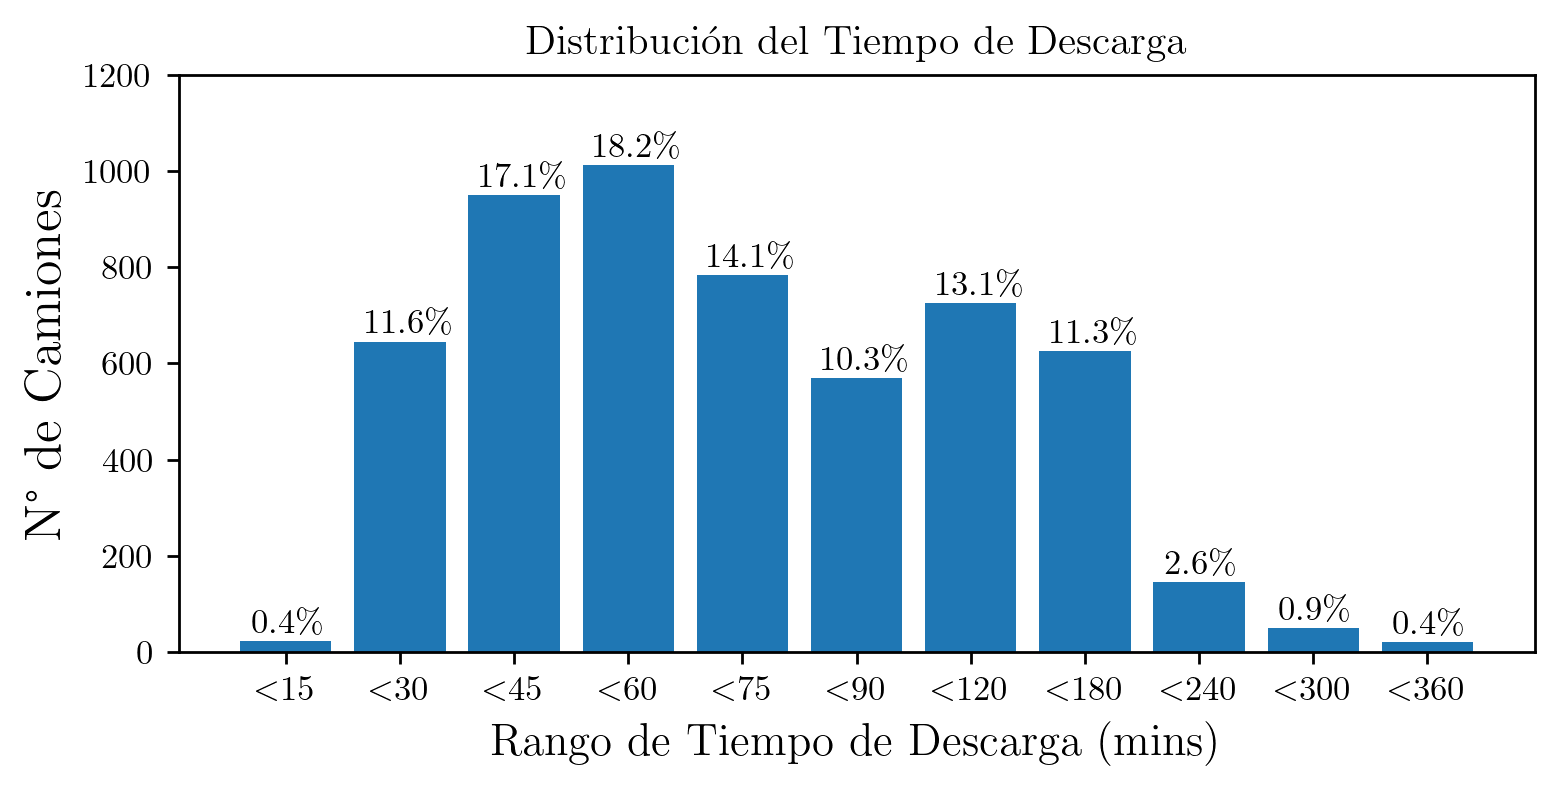

In [13]:
bins = np.array([r"$<$"+str(i) for i in rangos[1:]])
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Distribución del Tiempo de Descarga")
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango de Tiempo de Descarga (mins)", fontsize = 13)
ax1.bar(bins, pdf, label = "Viajes")
ax1.set_ylim([0,1200])


for i, label in enumerate(perc):
    plt.annotate(str(round(label,1))+"\%", (i-0.3, pdf[i]+17.))

plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")   

### 2 - Camiones por Turno

In [14]:
df_ss.reset_index(drop = True, inplace = True)

In [15]:
df_ss["Hora Ingreso a Puerto"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"])

In [16]:
t1 = datetime.time(0,0,0)
t2 = datetime.time(8,30,0)
t3 = datetime.time(10,0,0)
t4 = datetime.time(12,0,0)
t5 = datetime.time(14,0,0)
t6 = datetime.time(15,30,0)
t7 = datetime.time(17,0,0)
t8 = datetime.time(19,0,0)
t9 = datetime.time(21,0,0)
t10 = datetime.time(22,30,0)
t11 = datetime.time(23,59,59)


T = np.array([t2, t3, t4, t5, t6, t7, t8, t9, t10, t11])


turnos = np.array(["Pre", "T1A", "T1B", "T1C", "Almuerzo",
          "T2A", "T2B", "T2C", "T2D", "Post"])

In [17]:
def Turno(t):
    for idx, val in enumerate(T):
        if t.time() < val:
            return turnos[idx]

In [18]:
df_ss["Turno en Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Turno(x))

In [19]:
df_ss.head(3)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto
0,NaN,0.0,2020-01-15 22:10:58,31.000000,T2D
1,NaN,0.0,2020-01-15 22:13:21,693.516667,T2D
2,NaN,0.0,2020-01-15 22:15:35,714.750000,T2D


In [20]:
N_turnos = np.array([df_ss[df_ss["Turno en Puerto"] == i].shape[0] for i in turnos])
N_turnos

array([ 146,  828, 1143,  696,  475,  656,  810,  746,  181,    3])

In [21]:
T_turnos = np.array([df_ss["Tiempo Total en Puerto"][df_ss["Turno en Puerto"] == i].mean() for i in turnos])
T_turnos

array([ 78.18778539,  73.7328905 ,  87.85958005,  97.72624521,
       119.14950877,  78.46643801,  82.74024691, 118.85417784,
       160.69069982,  22.16111111])

In [22]:
T_ponderado = (N_turnos*T_turnos).sum()/N_turnos.sum()
T_ponderado

93.91511846117862

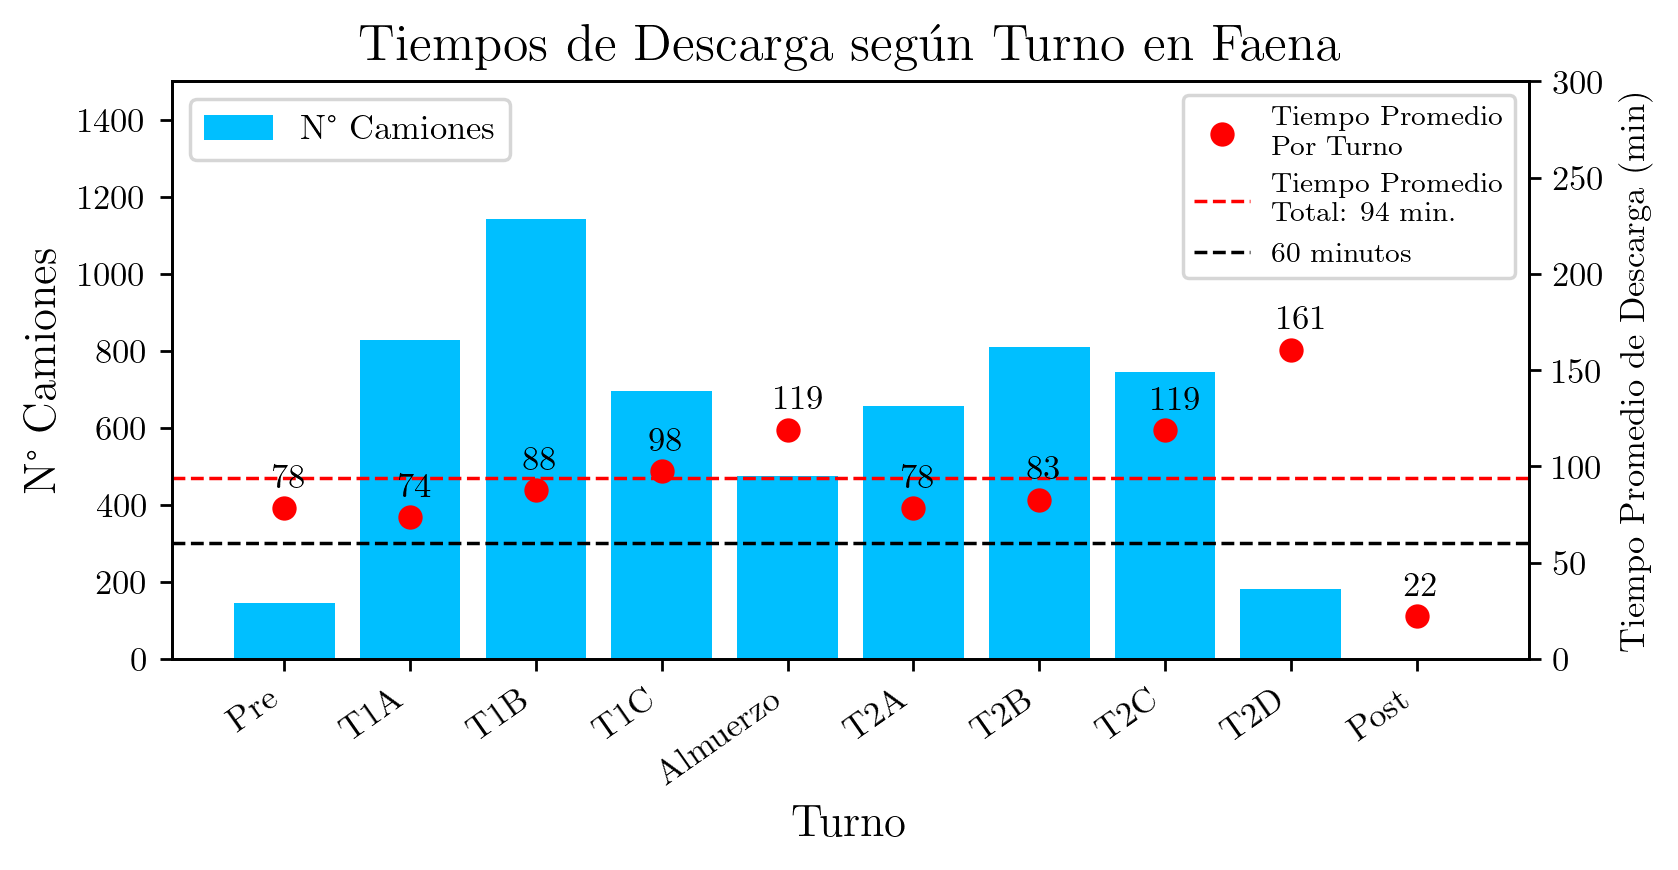

In [23]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.bar(turnos, N_turnos, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,1500])
ax1.set_ylabel("N° Camiones", fontsize = 13)
ax1.set_xlabel("Turno", fontsize = 13)
ax1.legend(loc = "upper left")
ax1.set_xticks(turnos)
ax1.set_xticklabels(turnos, rotation = 35, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


ax2 = ax1.twinx() 

ax2.plot(turnos, T_turnos, "ro", label = "Tiempo Promedio \n Por Turno")
ax2.set_title("Tiempos de Descarga según Turno en Faena", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_ponderado, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_ponderado)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([0,300])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_turnos):
    plt.annotate(str(round(label)), (i-0.1, T_turnos[i]+10.7))


plt.savefig("Graficos/Tiempos de Descarga por Turno.png", bbox_inches= "tight")

### 3 - Tiempos de Descarga por Mes

In [24]:
meses = ["Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre",
        "Enero", "Febrero", "Marzo", "Abril",
        "Mayo", "Junio", "Julio", "Agosto",
        "Septiembre", "Octubre", "Noviembre", "Diciembre"]

In [25]:
def Mes(date):
    idx = date.month - 1
    return meses[idx]

In [26]:
df_ss["Mes de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Mes(x))

In [27]:
df_ss["Año de Descarga"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: x.year)

In [28]:
df_ss.head(2)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga
0,NaN,0.0,2020-01-15 22:10:58,31.000000,T2D,Enero,2020
1,NaN,0.0,2020-01-15 22:13:21,693.516667,T2D,Enero,2020


In [29]:
años = df_ss["Año de Descarga"].unique()

In [30]:
N_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss[(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].shape[0]
        N_mes.append(a)

N_mes = np.array(N_mes)
N_mes

array([353, 721, 258, 893, 586, 572,   0,   0, 358, 559, 240,   0,   0,
         0,   0,   0,   0,   0,   0, 157, 409, 578,   0,   0])

In [31]:
len(N_mes), len(meses)

(24, 24)

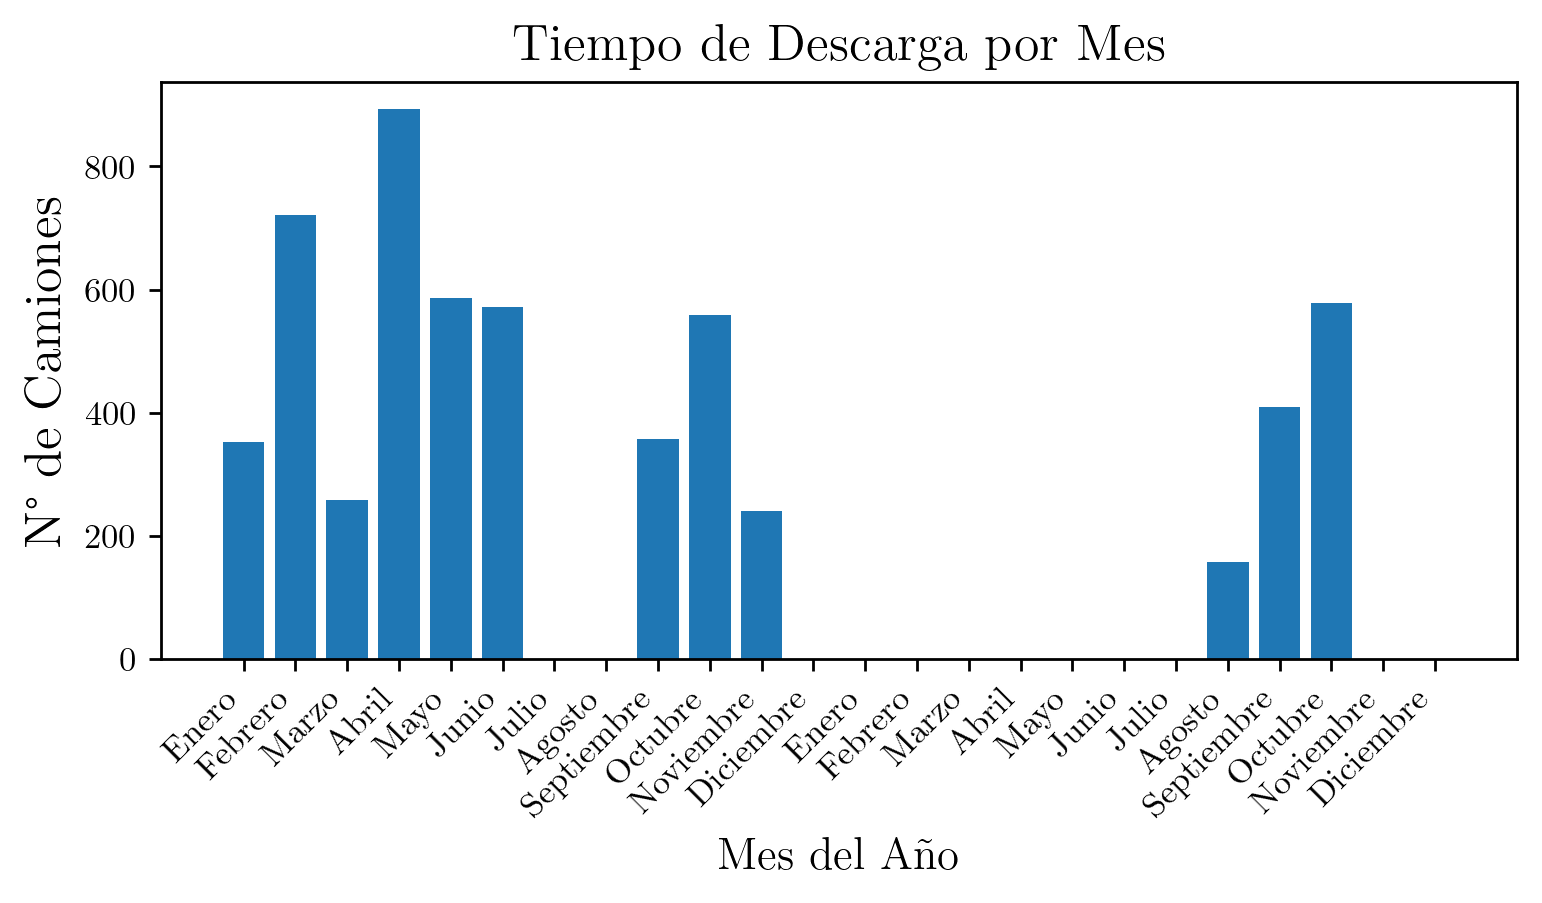

In [32]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "Viajes")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})


plt.show()
#ax1.set_ylim([0,1200])


#for i, label in enumerate(perc):
   # plt.annotate(str(round(label,1))+"\%", (i-0.3, pdf[i]+17.))

#plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")  

In [33]:
T_mes = []
for i in años:
    for j in meses[:12]:
        a = df_ss["Tiempo Total en Puerto"][(df_ss["Año de Descarga"]==i) & (df_ss["Mes de Descarga"]==j)].mean()
        T_mes.append(a)

T_mes = np.nan_to_num(np.array(T_mes))
T_mes 

array([108.3802644 ,  84.7221914 ,  83.05781654, 100.55851064,
        92.52977816, 111.39254079,   0.        ,   0.        ,
       121.67192737, 104.47191413,  88.12618056,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  50.70031847,
        69.22102689,  79.45322953,   0.        ,   0.        ])

In [34]:
T_mes_pond = (T_mes*N_mes).sum()/N_mes.sum()
T_mes_pond

93.91511846117858

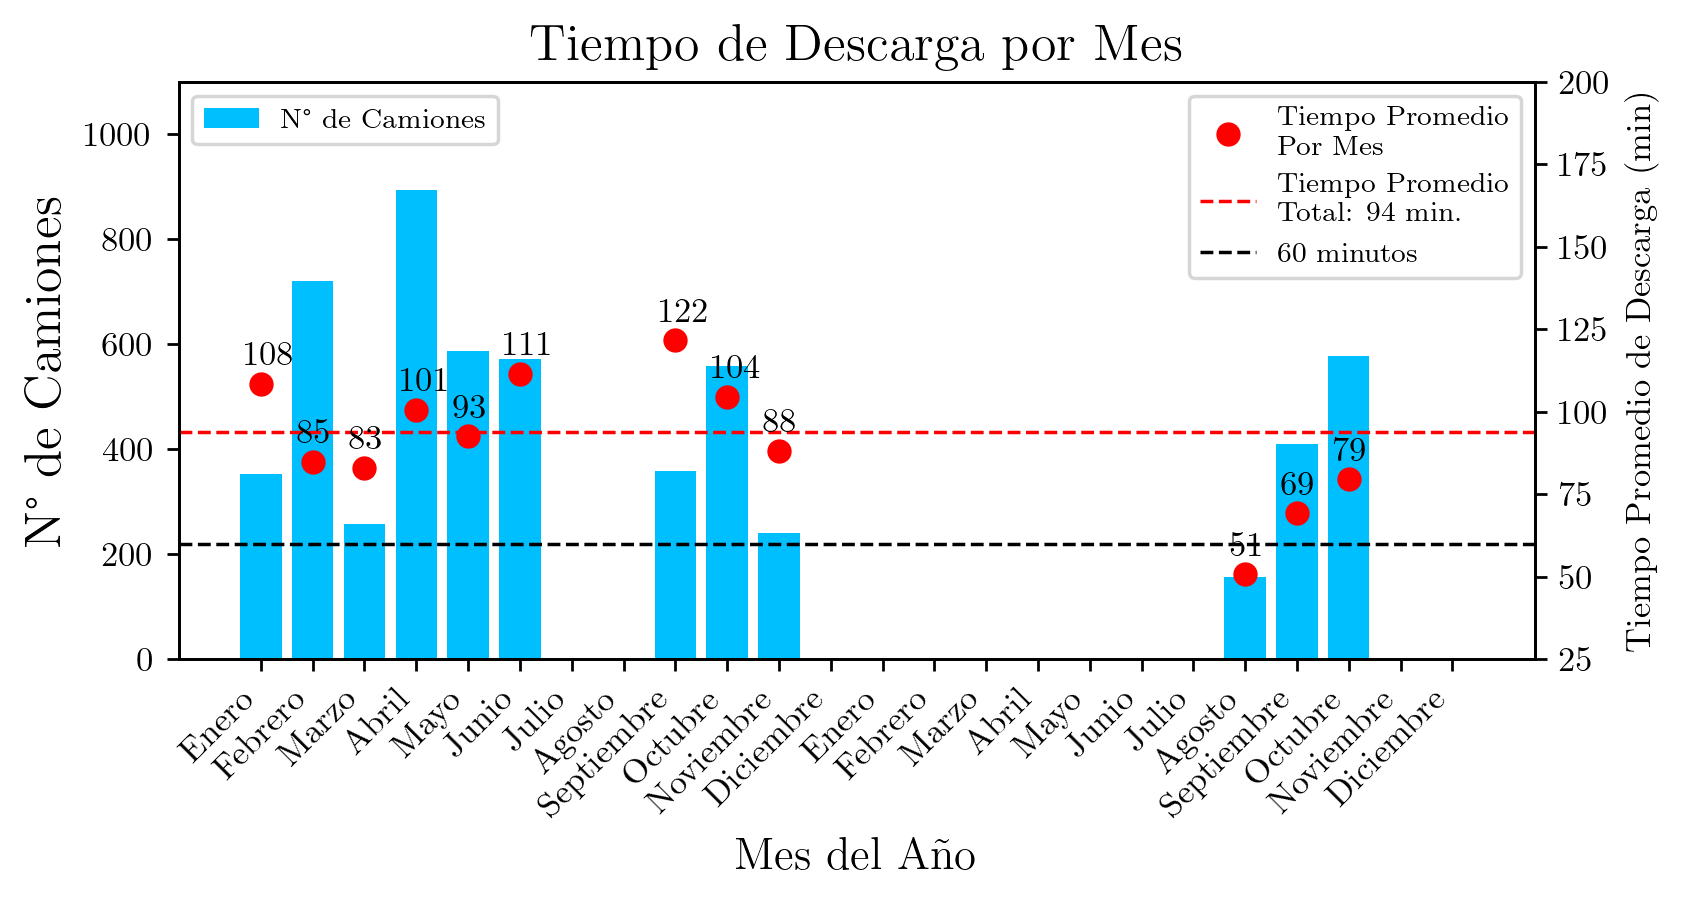

In [35]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

idx = np.arange(len(meses))
ax1.set_title("Tiempo de Descarga por Mes", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Mes del Año", fontsize = 13)
ax1.bar(idx, N_mes, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(idx)
ax1.set_xticklabels(meses, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,1100])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 

ax2.plot(idx, T_mes, "ro", label = "Tiempo Promedio \n Por Mes")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_mes_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_mes_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([25,200])
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_mes):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.3, T_mes[i]+5.7))


plt.savefig("Graficos/Tiempos de Descarga por Mes.png", bbox_inches= "tight")

plt.show()

### 4 - Tiempos de Descarga por Semana

In [36]:
df_ss["Semana del Año"] = pd.to_datetime(df_ss["Hora Ingreso a Puerto"]).dt.isocalendar().week

In [37]:
def Semana(date):
    fecha = date.isocalendar()
    string = str(fecha[0])+"-"+str(fecha[1])
    return string

In [38]:
df_ss["Semana del Año"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Semana(x))

In [39]:
df_ss.head(1)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Semana del Año
0,NaN,0.0,2020-01-15 22:10:58,31.0,T2D,Enero,2020,2020-3


In [40]:
semanas = df_ss["Semana del Año"].unique()
semanas.size

39

In [41]:
N_sem = np.array([df_ss[df_ss["Semana del Año"]==i].shape[0] for i in semanas])
N_sem.size

39

In [42]:
T_sem = np.array([df_ss["Tiempo Total en Puerto"][df_ss["Semana del Año"]==i].mean() for i in semanas])
T_sem.size

39

In [43]:
T_sem_pond = (T_sem*N_sem).sum()/N_sem.sum()
T_sem_pond

93.91511846117855

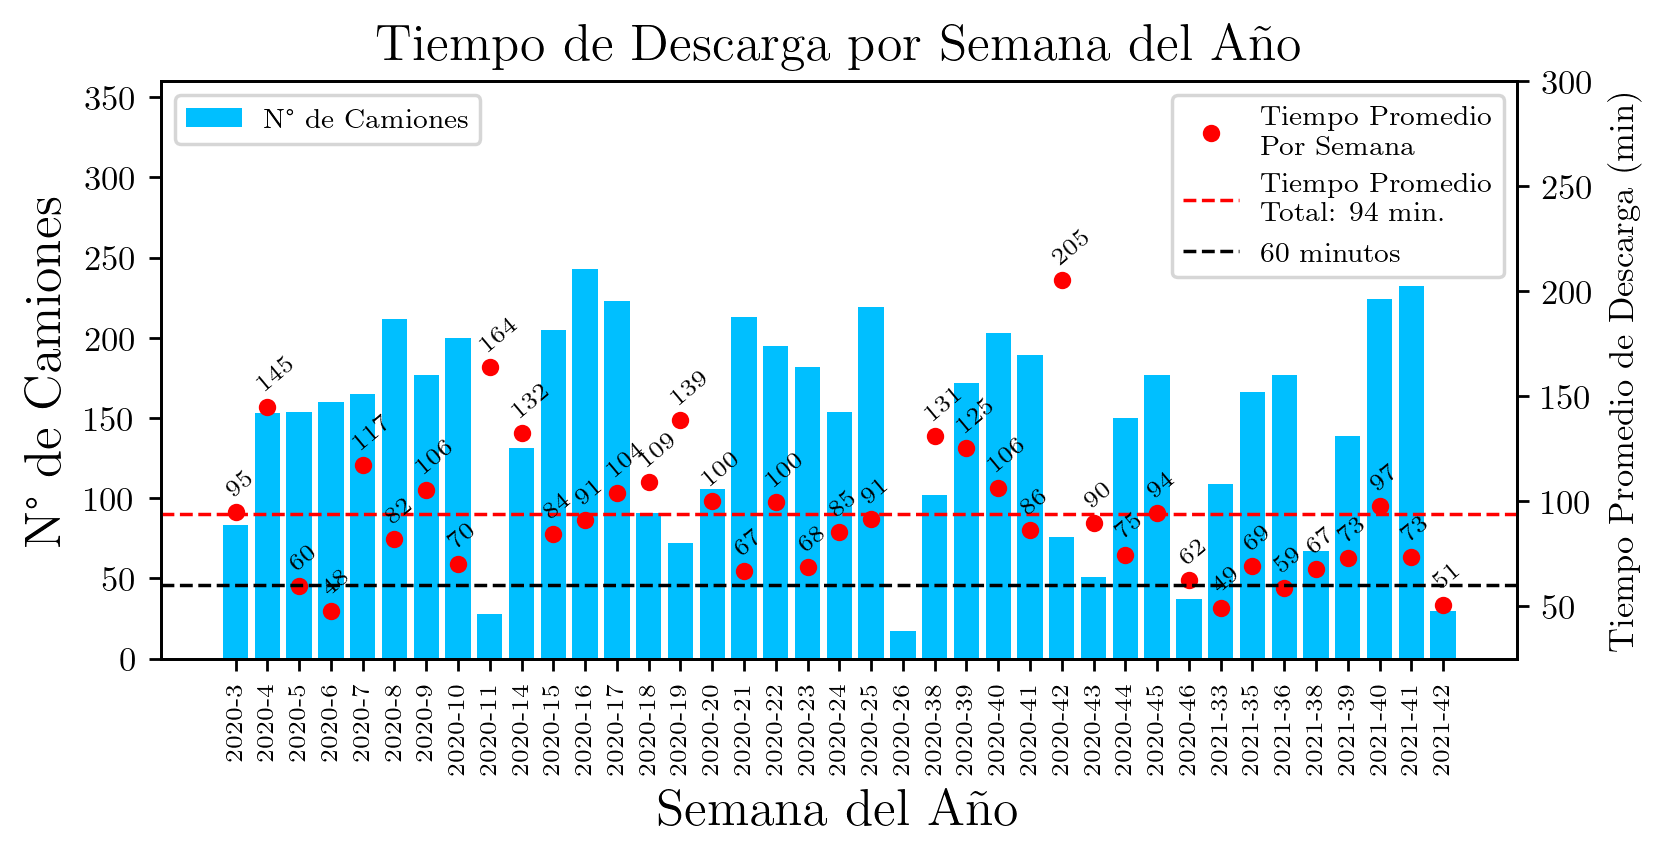

In [57]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Tiempo de Descarga por Semana del Año", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Semana del Año", fontsize = 15)
ax1.bar(semanas, N_sem, label = "N° de Camiones", color = "deepskyblue")
ax1.set_xticks(semanas)
ax1.set_xticklabels(semanas, rotation = 90, fontsize = 7, 
                    fontdict = {"horizontalalignment": "center"})
ax1.set_ylim([0,360])
ax1.legend(fontsize = 8, loc = "upper left")

ax2 = ax1.twinx() 
ax2.set_ylim([25,300])
ax2.plot(semanas, T_sem, "ro", label = "Tiempo Promedio \n Por Semana", markersize = 4)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = T_sem_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(T_sem_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")
ax2.legend(fontsize = 8, loc = "upper right")



for i, label in enumerate(T_sem):
    if (label != 0) & (label<1000):
        plt.annotate(str(round(label)), (i-0.4, label+7.7), fontsize=7, rotation = 40)


plt.savefig("Graficos/Tiempos de Descarga por Semana.png", bbox_inches= "tight")

plt.show()

### 5 - Camiones Por Rango Horario

In [175]:
df_ss["Rango Horario en Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

In [182]:
df_ss["Fecha de Ingreso a Puerto"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: x.date())

In [183]:
df_ss.head(3)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Semana del Año,Rango Horario en Puerto,Fecha de Ingreso a Puerto
0,NaN,0.0,2020-01-15 22:10:58,31.000000,T2D,Enero,2020,2020-3,22-23,2020-01-15
1,NaN,0.0,2020-01-15 22:13:21,693.516667,T2D,Enero,2020,2020-3,22-23,2020-01-15
2,NaN,0.0,2020-01-15 22:15:35,714.750000,T2D,Enero,2020,2020-3,22-23,2020-01-15


In [181]:
rangos = [str(i)+"-"+str(i+1) for i in range(24)] 

In [184]:
fechas = df_ss["Fecha de Ingreso a Puerto"].unique()
fechas.shape

(226,)

In [187]:
N_horas = [[] for i in rangos]

In [220]:
N_hrs = []
for i, vali in enumerate(rangos):
    suma = 0
    for j, valj in enumerate(fechas):
        a = df_ss[(df_ss["Rango Horario en Puerto"]==vali) & 
                  (df_ss["Fecha de Ingreso a Puerto"]==valj)].shape[0]
        suma += a
        N_horas[i].append(a)
    N_hrs.append(suma)

In [221]:
N_hrs = np.array(N_hrs)
N_hrs.sum()

5684

In [231]:
perc_hrs = 100*N_hrs/N_hrs.sum()

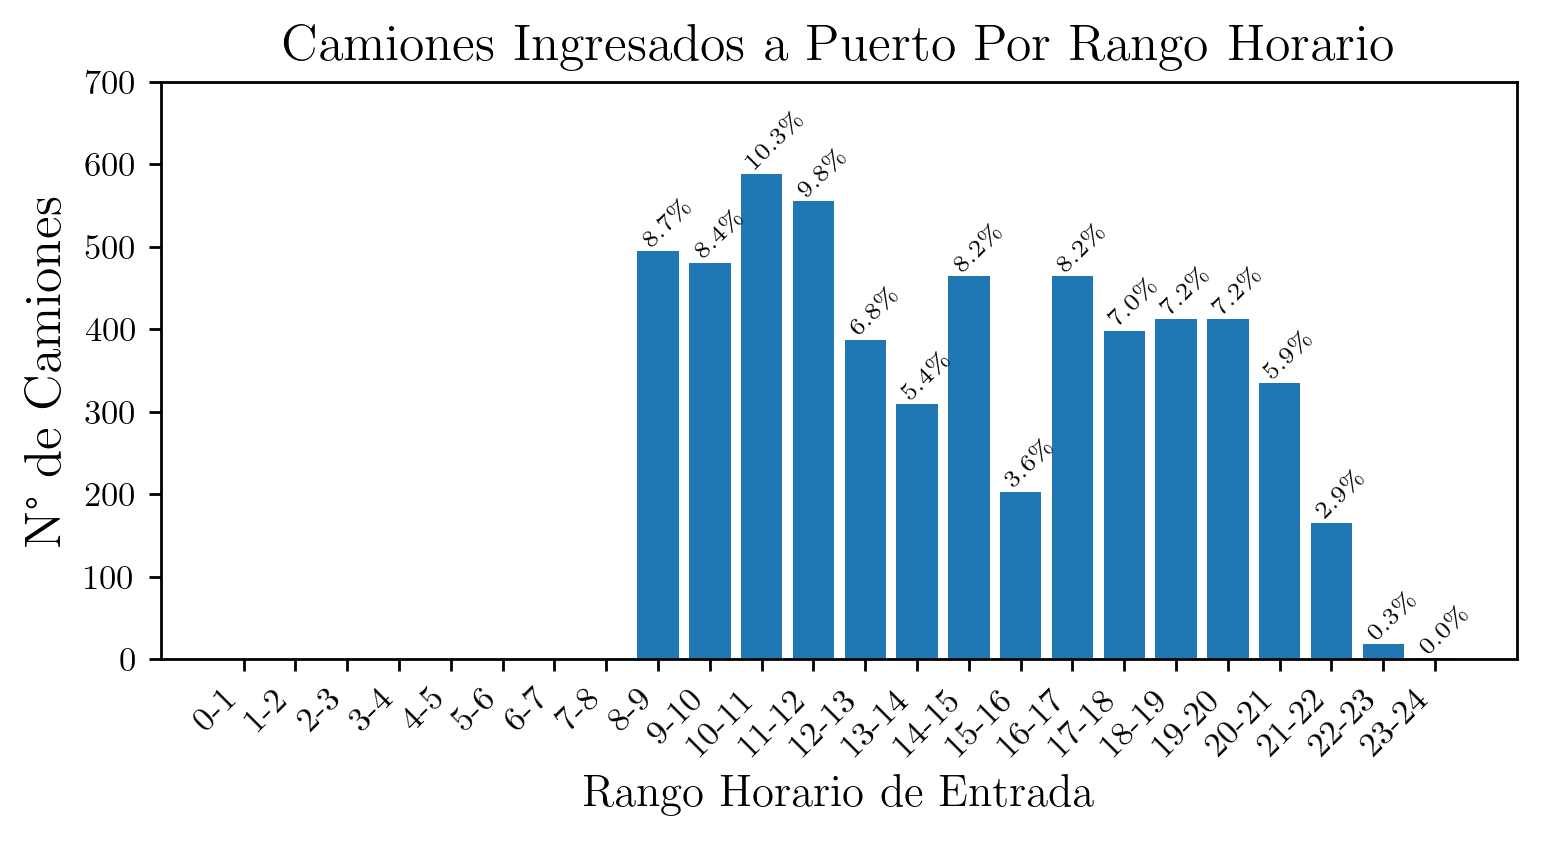

In [239]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(rangos, N_hrs, label = "Viajes")
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,700])


for i, label in enumerate(perc_hrs):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs[i]+5.15), 
                     fontsize = 7, rotation = 45)


plt.show()
#plt.savefig("Graficos/Distribucion Tiempo en Puerto.png", bbox_inches= "tight")  

In [244]:
rangos_2 = ["0-8"] + rangos[8:]
N_hrs_2 = N_hrs[7:]
perc_hrs_2 = 100*N_hrs_2/N_hrs_2.sum()

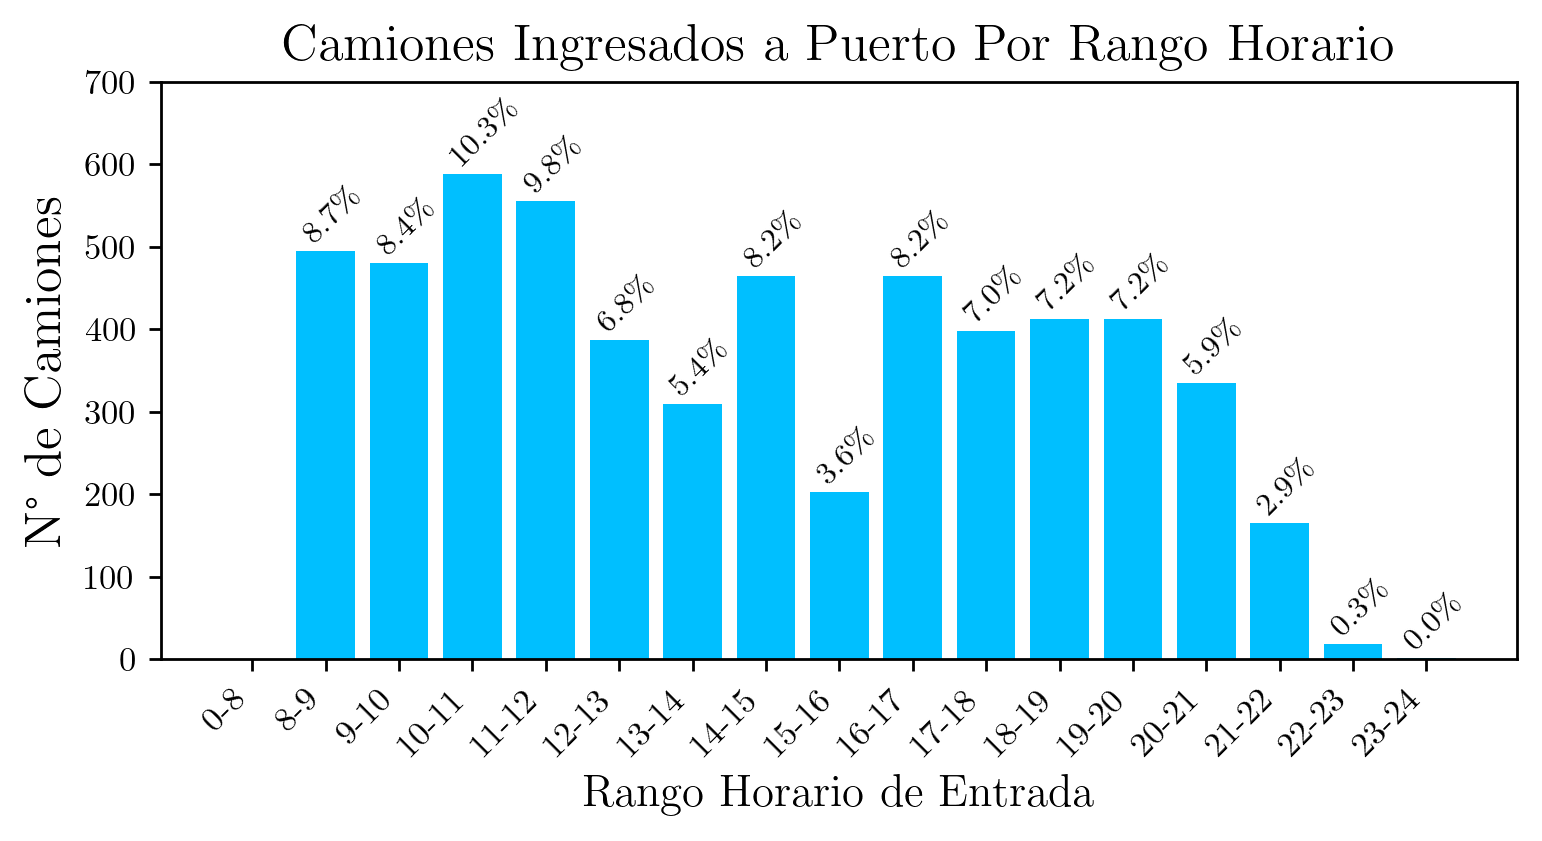

In [252]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Camiones Ingresados a Puerto Por Rango Horario", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario de Entrada", fontsize = 13)
ax1.bar(rangos_2, N_hrs_2, color = "deepskyblue")
ax1.set_xticks(rangos_2)
ax1.set_xticklabels(rangos_2, rotation = 45, fontsize = 10, 
                    fontdict = {"horizontalalignment": "right"})
ax1.set_ylim([0,700])


for i, label in enumerate(perc_hrs_2):
    if label != 0:
        plt.annotate(str(round(label,1)) + "\%", (i-0.35, N_hrs_2[i]+10.15), 
                     fontsize = 9, rotation = 45)

plt.savefig("Graficos/Camiones En Puerto Por Rango Horario.png", bbox_inches= "tight")  
plt.show()

### 6 - Histograma de Tiempos de Espera

In [253]:
def Nocturno(t):
    if t > datetime.time(23,0,0):
        return True
    elif t < datetime.time(8,0,0):
        return True
    else: 
        return False

In [254]:
df_ss["Turno Nocturno"] = df_ss["Hora Ingreso a Puerto"].apply(lambda x: Nocturno(x.time()))

In [258]:
df_ss[df_ss["Turno Nocturno"] == True]

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Semana del Año,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
5582,NaN,0.0,2021-10-15 23:10:10,18.816667,Post,Octubre,2021,2021-41,23-24,2021-10-15,True


In [257]:
df_ss.head()

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Semana del Año,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno
0,NaN,0.0,2020-01-15 22:10:58,31.000000,T2D,Enero,2020,2020-3,22-23,2020-01-15,False
1,NaN,0.0,2020-01-15 22:13:21,693.516667,T2D,Enero,2020,2020-3,22-23,2020-01-15,False
2,NaN,0.0,2020-01-15 22:15:35,714.750000,T2D,Enero,2020,2020-3,22-23,2020-01-15,False
3,NaN,0.0,2020-01-15 22:15:46,731.350000,T2D,Enero,2020,2020-3,22-23,2020-01-15,False
4,NaN,0.0,2020-01-15 22:22:53,741.800000,T2D,Enero,2020,2020-3,22-23,2020-01-15,False


In [259]:
df_espera = df_ss[df_ss["Hora Legada a Espera"].notna() & df_ss["Tiempo Espera [minutos]"].notna()]

In [260]:
df_espera.shape

(1695, 11)

In [265]:
import datetime as td
def Minutos_Sobrantes(t):
    if t.time() < td.time(8,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(14,0,0):
        return 0.
    elif t.time() < td.time(15,30,0):
        t_aux = td.datetime(t.year, t.month, t.day, 15, 30, 0)
        dt = (t_aux - t).total_seconds()/60.
        return dt
    elif t.time() < td.time(22,30,0):
        return 0.
    else:
        t_aux = td.datetime(t.year, t.month, t.day, 8, 30, 0) + td.timedelta(days=1)
        dt = (t_aux - t).total_seconds()/60.
        return dt

In [266]:
df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])

<ipython-input-266-d9d185a0ea9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Hora Legada a Espera"] = pd.to_datetime(df_espera["Hora Legada a Espera"])


In [267]:
df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))

<ipython-input-267-c9a0c46d32fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Minutos Sobrantes"] = df_espera["Hora Legada a Espera"].apply(lambda x: Minutos_Sobrantes(x))


In [268]:
df_espera["Tiempo Espera Limpio"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]

<ipython-input-268-6d2d2fc4659d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_espera["Tiempo Espera Limpio"] = df_espera["Tiempo Espera [minutos]"] - df_espera["Minutos Sobrantes"]


In [271]:
T_espera = df_espera["Tiempo Espera Limpio"][df_espera["Tiempo Espera Limpio"]>0]
T_espera.max()

1659.23333333

In [308]:
Bins = [15*i for i in range(17)]
Bins.append(480)
Bins.append(960)
Bins.append(1665)
h, b = np.histogram(T_espera, bins=Bins)

In [312]:
bins = []
for i in range(len(b[:-5])):
    bins.append(str(round(b[i]))+"-"+str(round(b[i+1])))

bins = np.array(bins + ["225-4h", "4h-8h", "8h-16h", "16h-28h"])
bins

array(['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90-105',
       '105-120', '120-135', '135-150', '150-165', '165-180', '180-195',
       '195-210', '210-225', '225-4h', '4h-8h', '8h-16h', '16h-28h'],
      dtype='<U7')

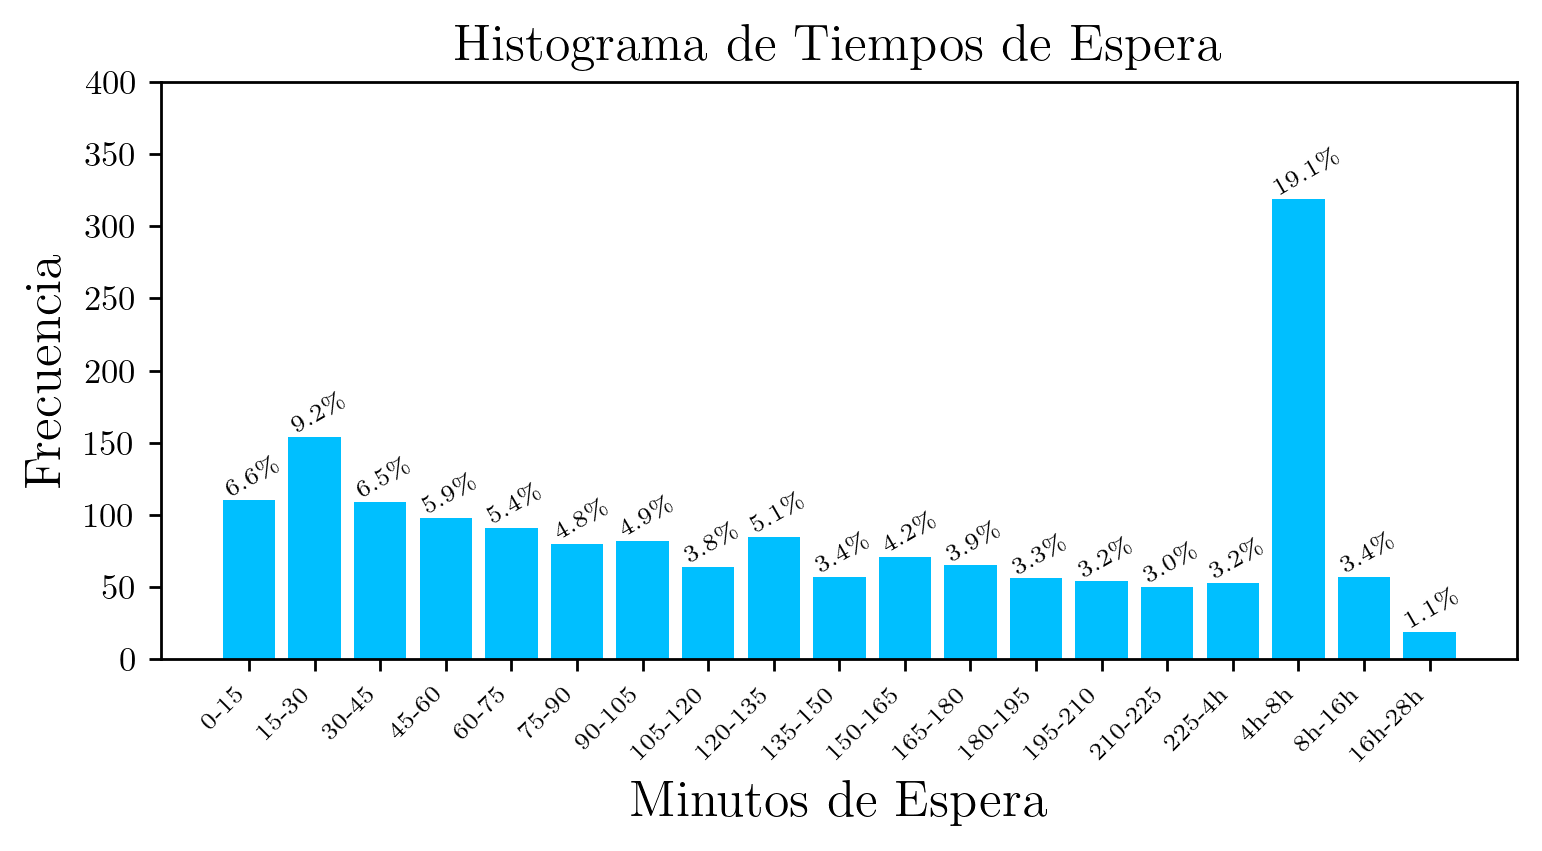

In [316]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(bins, h, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Histograma de Tiempos de Espera", fontsize = 15)
ax2.set_ylabel("Frecuencia", fontsize = 15)

ax2.set_xticks(bins)
ax2.set_xticklabels(bins, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Minutos de Espera", fontsize = 15)
ax2.set_ylim([0,400])

perc = 100*h/h.sum()
for i, label in enumerate(perc):
    #if label > 0.1:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, h[i]+2.5), 
                     fontsize = 7, rotation = 30)

plt.savefig("Graficos/Histograma de Tiempos de Espera.png", bbox_inches= "tight")

### 7 - Tiempos de Espera Promedio Segun Hora de Llegada

In [318]:
df_clean = df_espera[df_espera["Tiempo Espera Limpio"]>0]

In [329]:
df_clean.shape

(1674, 13)

In [331]:
df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))

<ipython-input-331-9357ba486778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Rango Horario en Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: str(x.hour)+"-"+str(x.hour+1))


In [332]:
df_clean.head(3)

,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Turno en Puerto,Mes de Descarga,Año de Descarga,Semana del Año,Rango Horario en Puerto,Fecha de Ingreso a Puerto,Turno Nocturno,Minutos Sobrantes,Tiempo Espera Limpio,Rango Horario en Espera
13,2020-01-17 09:48:08,14.850000,2020-01-17 10:02:59,50.250000,T1B,Enero,2020,2020-3,10-11,2020-01-17,False,0.000000,14.850000,9-10
14,2020-01-17 10:04:00,14.583333,2020-01-17 10:18:35,54.883333,T1B,Enero,2020,2020-3,10-11,2020-01-17,False,0.000000,14.583333,10-11
16,2020-01-17 07:57:38,223.266667,2020-01-17 11:40:54,51.533333,T1B,Enero,2020,2020-3,11-12,2020-01-17,False,32.366667,190.900000,7-8


In [334]:
N_rangos = np.array([df_clean[df_clean["Rango Horario en Espera"] == i].shape[0] for i in rangos])

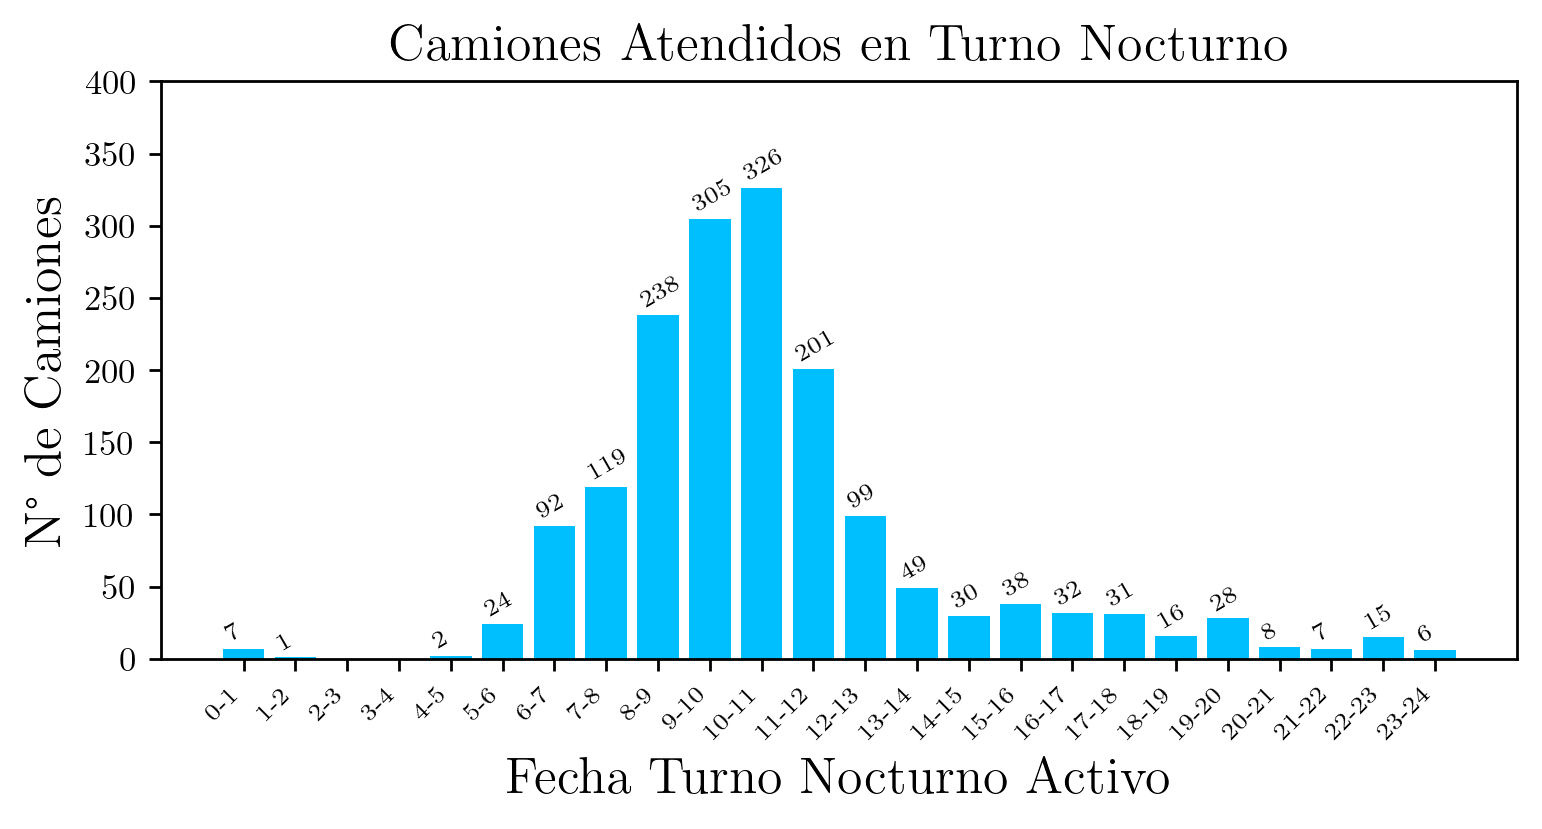

In [345]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


ax2.bar(rangos, N_rangos, color = "deepskyblue") # 
ax2.set_title("Camiones Atendidos en Turno Nocturno", fontsize = 15)
ax2.set_ylabel("N° de Camiones", fontsize = 15)

ax2.set_xticks(rangos)
ax2.set_xticklabels(rangos, rotation = 45, fontsize = 7, 
                    fontdict = {"horizontalalignment": "right"})
ax2.set_xlabel("Fecha Turno Nocturno Activo", fontsize = 15)
ax2.set_ylim([0,400])

for i, label in enumerate(N_rangos):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.4, label+5.5), 
                     fontsize = 7, rotation = 30)

#plt.savefig("Graficos/Camiones Atendidos en Turno Nocturno.png", bbox_inches= "tight")

In [377]:
T_rangos = np.array([df_clean["Tiempo Espera Limpio"][df_clean["Rango Horario en Espera"] == i].mean() for i in rangos])

In [378]:
T_rangos = np.nan_to_num(T_rangos)
T_rangos

array([232.11666667, 184.81666667,   0.        ,   0.        ,
        12.        ,  61.85416667, 140.51721014, 146.83109244,
       179.07310924, 154.72546448, 166.21262781, 194.15771144,
       219.08299663, 190.63401361,  99.01666667, 125.23947368,
       212.1234375 , 209.82258065, 198.69270833, 291.75714286,
       329.5125    , 677.68333333, 544.18222222, 103.30833333])

In [379]:
T_rangos_pond = (T_rangos*N_rangos).sum()/N_rangos.sum()

In [382]:
idx = []
T_rang = []
for i, val in enumerate(T_rangos):
    if val != 0:
        idx.append(i)
        T_rang.append(val)
T_rang = np.array(T_rang)
T_rang

array([232.11666667, 184.81666667,  12.        ,  61.85416667,
       140.51721014, 146.83109244, 179.07310924, 154.72546448,
       166.21262781, 194.15771144, 219.08299663, 190.63401361,
        99.01666667, 125.23947368, 212.1234375 , 209.82258065,
       198.69270833, 291.75714286, 329.5125    , 677.68333333,
       544.18222222, 103.30833333])

In [383]:
T_rangos

array([232.11666667, 184.81666667,   0.        ,   0.        ,
        12.        ,  61.85416667, 140.51721014, 146.83109244,
       179.07310924, 154.72546448, 166.21262781, 194.15771144,
       219.08299663, 190.63401361,  99.01666667, 125.23947368,
       212.1234375 , 209.82258065, 198.69270833, 291.75714286,
       329.5125    , 677.68333333, 544.18222222, 103.30833333])

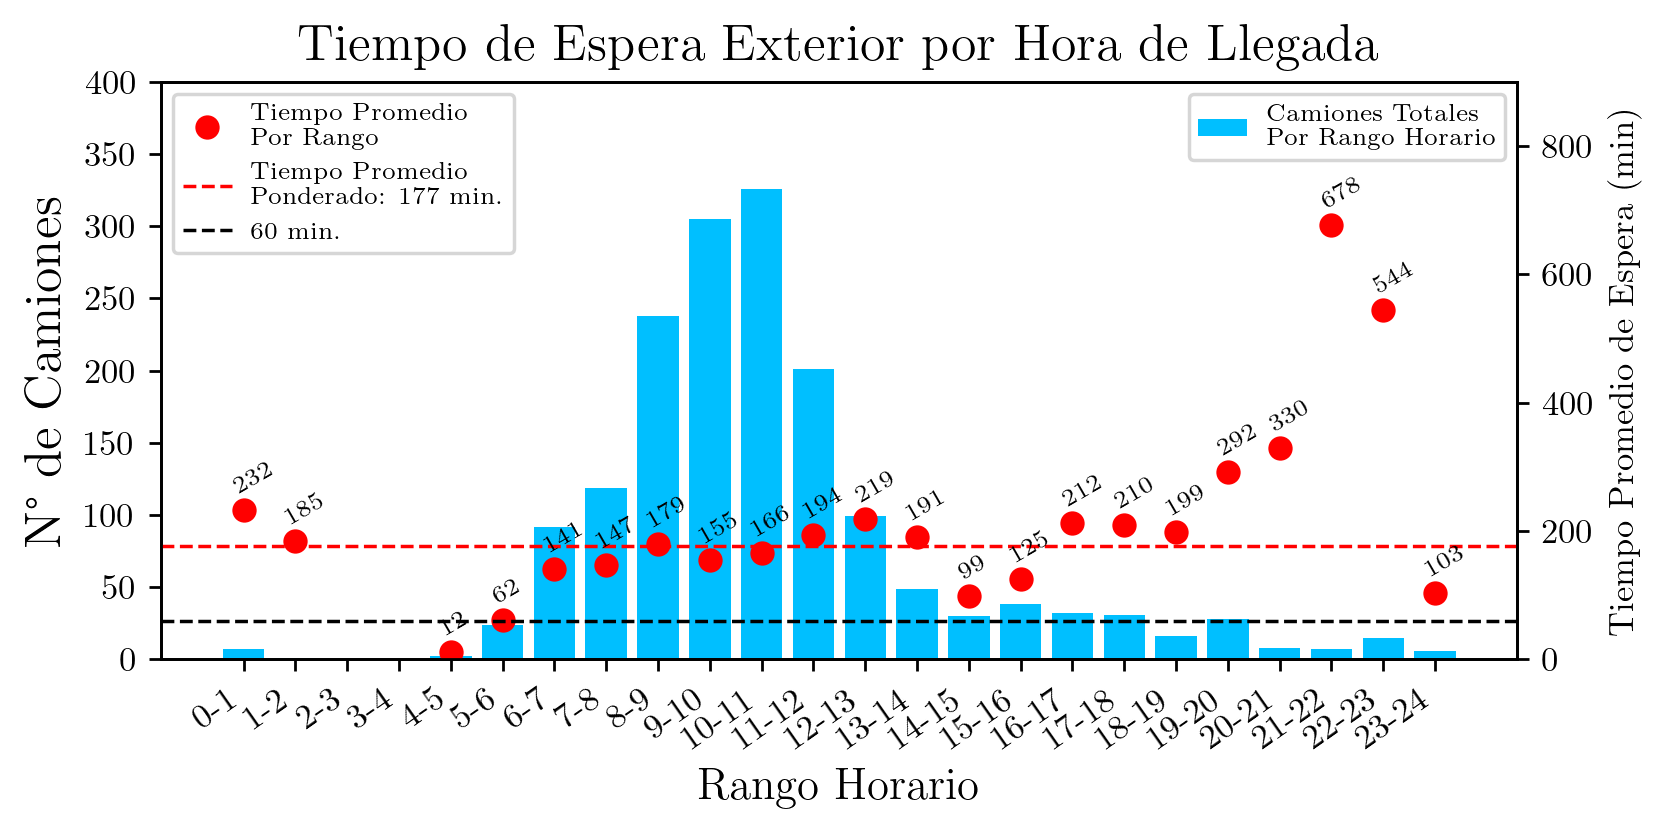

In [427]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, N_rangos, label = "Camiones Totales \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Tiempo de Espera Exterior por Hora de Llegada", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.legend(loc = "upper right",fontsize = 7)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,400])
#ax2.legend(fontsize = 7)



ax2 = ax1.twinx() 

ax2.plot(idx, T_rang, "ro", label = "Tiempo Promedio \n Por Rango")
ax2.set_ylabel("Tiempo Promedio de Espera (min)", fontsize = 10)
ax2.axhline(y = T_rangos_pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Ponderado: "+ str(round(T_rangos_pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 min.")

ax2.set_ylim([0,900])
ax2.legend(loc = "upper left",fontsize = 7)



for i, label in enumerate(T_rangos):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.25, label+25.9), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Tiempos de Espera Por Hora de LLegada.png", bbox_inches= "tight")

### 8 - Camiones En Espera Promedio Por Rango Horario

In [390]:
df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())

<ipython-input-390-865edbdc0d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Fecha de Ingreso a Espera"] = df_clean["Hora Legada a Espera"].apply(lambda x: x.date())


In [393]:
fechas_espera = df_clean["Fecha de Ingreso a Espera"].unique()

In [397]:
rang_mean = [[] for i in rangos]
for i, vali in enumerate(rangos):
    for j, valj in enumerate(fechas_espera):
        a = df_clean[(df_clean["Fecha de Ingreso a Espera"] == valj) &
                    (df_clean["Rango Horario en Espera"] == vali)].shape[0]
        
        rang_mean[i].append(a)
        
len(rang_mean), len(rangos)

(24, 24)

In [406]:
rango_prom = [np.array(i).mean() for i in rang_mean]
rango_max = [np.array(i).max() for i in rang_mean]

In [425]:
idx = []
rango_prom_aux = []
for i, val in enumerate(rango_prom):
    if val != 0:
        idx.append(i)
        rango_prom_aux.append(val)
rango_prom_aux = np.array(rango_prom_aux)
rango_prom_aux

array([0.03240741, 0.00462963, 0.00925926, 0.11111111, 0.42592593,
       0.55092593, 1.10185185, 1.41203704, 1.50925926, 0.93055556,
       0.45833333, 0.22685185, 0.13888889, 0.17592593, 0.14814815,
       0.14351852, 0.07407407, 0.12962963, 0.03703704, 0.03240741,
       0.06944444, 0.02777778])

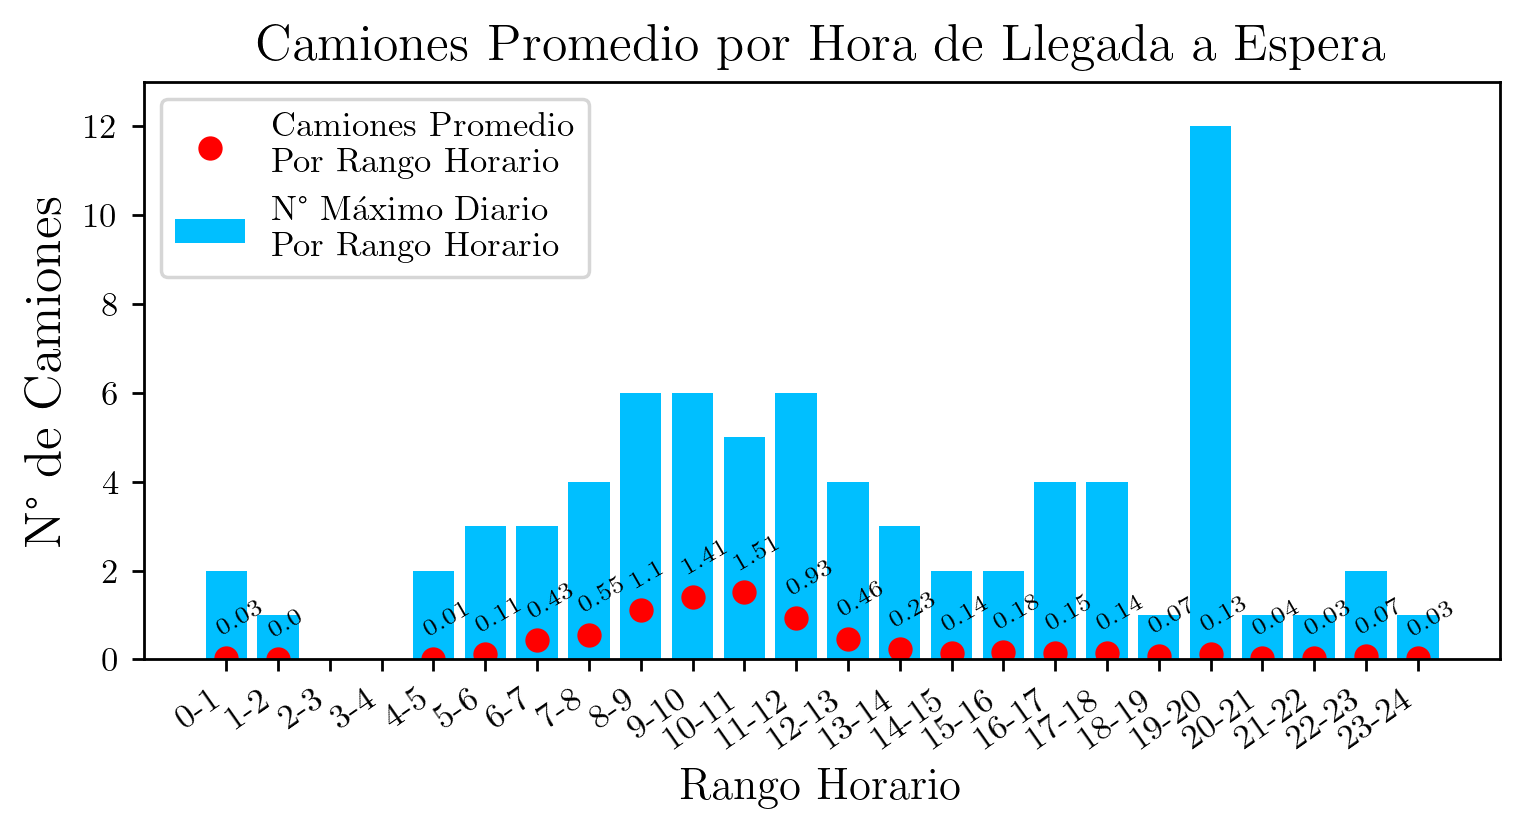

In [429]:
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.bar(rangos, rango_max, label = "N° Máximo Diario \n Por Rango Horario", color = "deepskyblue")
ax1.set_title("Camiones Promedio por Hora de Llegada a Espera", fontsize = 15)
ax1.set_ylabel("N° de Camiones", fontsize = 15)
ax1.set_xlabel("Rango Horario", fontsize = 13)
ax1.set_xticks(rangos)
ax1.set_xticklabels(rangos, rotation = 35, fontdict = {"horizontalalignment": "right"})

ax1.set_ylim([0,13])
#ax2.legend(fontsize = 7)


ax1.plot(idx, rango_prom_aux, "ro", label = "Camiones Promedio \n Por Rango Horario")
ax1.legend(loc = "upper left",fontsize = 10)
#ax2.legend(loc = "upper left",fontsize = 7)


for i, label in enumerate(rango_prom):
    if label != 0:
        plt.annotate(str(round(label,2)), (i-0.25, label+0.5), fontsize = 7, rotation = 30)
    
plt.savefig("Graficos/Camiones Promedio en Espera Por Rango Horario.png", bbox_inches= "tight")